# Amadeus Data Challenge

## Lorenzo von Ritter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
time searches = pd.read_csv("../searches.csv", sep="^", usecols=['Date','Origin','Destination'], parse_dates=[0], dtype={'Origin': object,'Destination': object})

CPU times: user 2min 35s, sys: 10.6 s, total: 2min 45s
Wall time: 4min 51s


In [148]:
time bookings = pd.read_csv("../bookings.csv", sep="^", usecols=['dep_port','arr_port','arr_city','pax'], dtype={'dep_port': object, 'arr_port': object, 'arr_city': object, 'pax': np.float64})

CPU times: user 58.8 s, sys: 8.38 s, total: 1min 7s
Wall time: 4min 7s


###Exercise 1: Count the number of lines

##### compare shape and count()

In [13]:
time searches.shape[0]

CPU times: user 55 µs, sys: 4 µs, total: 59 µs
Wall time: 68.9 µs


20390198

In [14]:
time searches.Date.count()

CPU times: user 792 ms, sys: 31.6 ms, total: 824 ms
Wall time: 891 ms


20390198

##### shape is quicker than count()

In [15]:
searchesSize = searches.shape[0]
searchesSize

20390198

In [16]:
bookingsSize = bookings.shape[0]
bookingsSize

10000010

### Execise 2: Top 10 airports

In [34]:
airports = bookings.groupby('arr_port').pax.count()
airports.sort(ascending=0)

In [37]:
airports[0:10]

arr_port
LHR         215551
JFK         158930
CDG         149390
LAX         143220
DXB         135640
BKK         130420
MIA         117820
SFO         110970
MNL         109530
ORD          99750
dtype: int64

### Exercise 3: Monthly arrivals in Málaga, Madrid and Barcelona

In [19]:
searches.dtypes

Date           object
Origin         object
Destination    object
dtype: object

##### make date column of type datetime

In [20]:
searches.Date = pd.to_datetime(searches.Date)

In [22]:
searches.dtypes

Date           object
Origin         object
Destination    object
dtype: object

##### did not work

In [38]:
special_searches = searches[(searches["Destination"] == "AGP") | (searches["Destination"] == "BCN") | (searches["Destination"] == "MAD") | (searches["Destination"] == "TOJ")]

In [39]:
datecount = special_searches.groupby(['Date','Destination']).Date.count()
datecount = datecount.unstack('Destination')
datecount.index.dtype

dtype('O')

##### still did not work

In [40]:
datecount.index = pd.to_datetime(datecount.index)
datecount.index.dtype

dtype('<M8[ns]')

##### now it worked

In [41]:
monthcount = datecount.resample('M', how=sum)
monthcount

Destination,AGP,BCN,MAD,TOJ
2013-01-31,9633,29469,24258,NaN
2013-02-28,8379,28329,22800,NaN
2013-03-31,10659,30552,24681,NaN
2013-04-30,8265,31236,25251,NaN
2013-05-31,10830,28728,26334,NaN
2013-06-30,7923,26505,22800,NaN
2013-07-31,8892,29241,22971,NaN
2013-08-31,7866,27075,21831,57
2013-09-30,8151,23427,21147,57
2013-10-31,6499,20276,22294,NaN


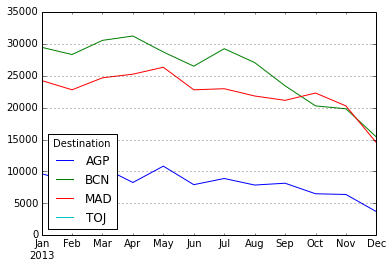

In [44]:
monthcount.plot()

### Exercise 4: Join DataFrames

In [215]:
shortSearches = searches.head(100)
shortBookings = bookings.head(100)

In [182]:
shortSearches['Origin'] = shortSearches['Origin'].str.upper()
shortSearches['Destination'] = shortSearches['Destination'].str.upper()

In [183]:
shortBookings['dep_port'] = shortBookings['dep_port'].str.upper()
shortBookings['arr_port'] = shortBookings['arr_port'].str.upper()

In [216]:
shortBookings.columns = ['Origin','Destination','DestinationCity', 'Pax']

In [185]:
bookedSearches = pd.merge(shortSearches, shortBookings, on=['Destination'], how='left')

In [158]:
bookedSearches = pd.merge(shortSearches, shortBookings, left_on='Destination', right_on='arr_port')

In [186]:
bookedSearches

,Date,Origin_x,Destination,Origin_y,DestinationCity,Pax
0,2013-01-01,TXL,AUH,NaN,NaN,NaN
1,2013-01-01,ATH,MIL,NaN,NaN,NaN
2,2013-01-01,STR,MIL,NaN,NaN,NaN
3,2013-01-01,ICT,SFO,NaN,NaN,NaN
4,2013-01-01,QYG,SFO,NaN,NaN,NaN
5,2013-01-01,RNB,ARN,NaN,NaN,NaN
6,2013-01-01,OSL,MAD,NaN,NaN,NaN
7,2013-01-01,IAH,BLR,NaN,NaN,NaN
8,2013-01-01,CPH,PAR,NaN,NaN,NaN
9,2013-01-01,MAH,PAR,NaN,NaN,NaN


In [211]:
shortSearches.dtypes

Date           object
Origin         object
Destination    object
dtype: object

In [212]:
shortBookings.dtypes

Origin              object
Destination         object
DestinationCity     object
Pax                float64
dtype: object

##### this should work but it doesn't

In [217]:
shortBookings[shortBookings['Destination'] == "LHR"]

,Origin,Destination,DestinationCity,Pax
0,ZRH,LHR,LON,-1


In [218]:
shortBookings[shortBookings['Destination'].str.contains("LHR")]

,Origin,Destination,DestinationCity,Pax
0,ZRH,LHR,LON,-1


In [219]:
shortBookings['Destination'][1]

'CLT'

##### Ahaaa, that's why. Get the tab out of there!

In [220]:
shortBookings['Destination'] = shortBookings['Destination'].str.strip()
shortBookings['Destination'][1]

'CLT'

##### Better. Now the rest...

In [221]:
shortBookings['Origin'][1]

'SAL     '

In [222]:
shortBookings['DestinationCity'][1]

'CLT     '

In [223]:
shortBookings['Pax'][1]

1.0

In [224]:
shortBookings['Origin'] = shortBookings['Origin'].str.strip()
shortBookings['Origin'][1]

'SAL'

In [225]:
shortBookings['DestinationCity'] = shortBookings['DestinationCity'].str.strip()
shortBookings['DestinationCity'][1]

'CLT'